# Concessão de crédito


Autora: Luana Fraga de Andrade Araujo

E-mail: luafraga1@hotmail.com

LinkedIn: www.linkedin.com/in/luana-fraga-63a794193/

Github: https://github.com/luanafraga

# Objetivo do Projeto

O objetivo deste projeto é criar um **modelo de decisão de crédito** para que o Bytebank, um banco digital, use na concessão deste. O evento que nós estamos buscando é **classificar os nossos solicitantes em adimplentes ou inadimplentes**, de acordo com as informações cadastrais e financeiras fornecidas pelo cliente.

# Base de dados

A base de dados possui informações sobre:
    
- **default:** se o cliente foi adimplente (1) ou inadimplente (0)
- **conta_corrente:** valor em conta corrente
- **prazo_emprestimo_meses:** prazo do empréstimo em meses
- **historico_credito:** histórico de crédito do cliente
- **proposito_emprestimo:** propósito do empréstimo
- **valor_emprestimo:** valor do empréstimo
- **reserva_cc:** reserva em conta corrente
- **tempo_emprego_atual:** tempo do emprego atual do cliente
- **taxa_comp_salario:** taxa de comprometimento do salário
- **sexo_est_civil:** sexo e estado civil do cliente
- **outros_fiadores:** se o cliente possui outros fiadores
- **anos_residencia_atual:** quantidade de anos da residencia atual do cliente
- **propriedade:** se o cliente possui propriedade
- **idade:** idade do cliente
- **outros_planos_financiamento:** se o cliente possui outros planos de financiamento
- **tipo_residencia:** tipo de residência
- **n_creditos_banco:** quantidade de créditos no banco
- **status_emprego:** se o cliente está empregado
- **n_dependentes:** número de dependentes do cliente
- **telefone:** se o cliente possui telefone
- **trabalhador_estrangeiro:** se o cliente é estrangeiro

# Importação de pacotes

In [1]:
import pandas as pd
import numpy as np

# para visualização dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [70]:
# para criação e validação dos modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# para garantir a replicabilidade do código
SEED = 77

In [3]:
#definindo paleta e estilo dos gráficos
sns.set_palette('pastel')
sns.set_style("white")

In [4]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


# Leitura dos dados

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [6]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreement/ life insurance,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [7]:
dados.shape

(1000, 21)

In [8]:
print(f'Nosso Conjunto de Dados inicial tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso Conjunto de Dados inicial tem 1000 linhas e 21 colunas.


# Informações do DataFrame

In [9]:
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [11]:
duplicados = dados.duplicated().sum()
duplicados

0

In [12]:
print(f'A base de dados tem {duplicados} valores duplicados.')

A base de dados tem 0 valores duplicados.


In [13]:
nulos = dados.isna().sum().sum()
nulos

0

In [14]:
print(f'A base de dados tem {nulos} valores nulos.')

A base de dados tem 0 valores nulos.


# Análise exploratória

In [15]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
prazo_emprestimo_meses,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
valor_emprestimo,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
taxa_comp_salario,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
anos_residencia_atual,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
idade,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
n_creditos_banco,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
n_dependentes,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [16]:
dados.describe(include=[object]).T

,count,unique,top,freq
conta_corrente,1000,4,no checking account,394
historico_credito,1000,5,existing credits paid back duly till now,530
proposito_emprestimo,1000,10,domestic appliances,280
reserva_cc,1000,5,... < 100 DM,603
tempo_emprego_atual,1000,5,1 <= ... < 4 years,339
sexo_est_civil,1000,4,male : single,548
outros_fiadores,1000,3,none,907
propriedade,1000,4,"if not A121/A122 : car or other, not in attribute 6",332
outros_planos_financiamento,1000,3,none,814
tipo_residencia,1000,3,own,713


Para começar a análise, vamos utilizar o método **.describe()** para entender alguns métodos estatísticos que temos dentro da base de dados. O método describe() fornece as informações sobre:

- Para variáveis **quantitativas**:

   - **count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

   - **mean** - O valor médio, em média aritmética. 

   - **std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

   - **min e max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

   - **quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.


- Para variáveis **categóricas**:

    - **unique** é a quantidade de valores únicos

    - **top** é o valor mais comum

    - **freq** é a frequência do valor mais comum

## Análise default

In [17]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

Na nossa base de dados temos uma proporção de **70% de créditos negados** versus **30% de créditos concedidos**.

## Análise Sexo e Estado civil

In [18]:
dados['sexo_est_civil'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: sexo_est_civil, dtype: int64

Temos um total de **310 mulheres** e **690 homens** na nossa base de dados.

<AxesSubplot:title={'center':'Distribuição de sexo e estado civil'}, xlabel='sexo_est_civil', ylabel='count'>

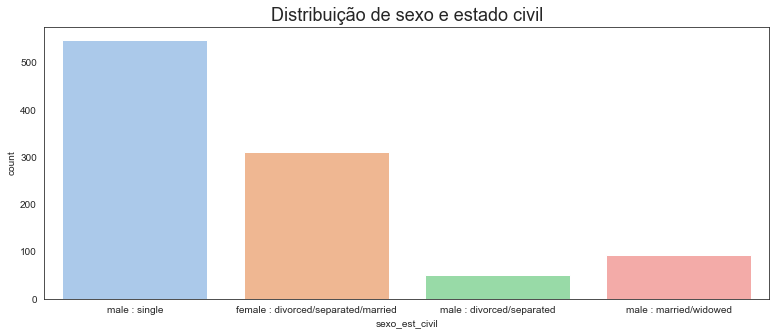

In [19]:
plt.figure(figsize = (13,5))
plt.title('Distribuição de sexo e estado civil', fontsize=18)
sns.countplot(x = 'sexo_est_civil', data = dados)

## Análise Idade

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Idade'}, xlabel='idade'>

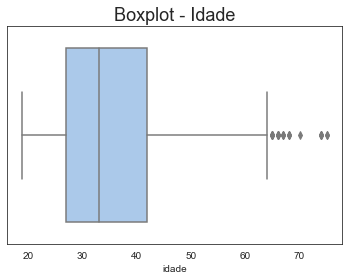

In [20]:
plt.title('Boxplot - Idade', fontsize=18)
sns.boxplot('idade', data=dados)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição da idade'}, xlabel='idade'>

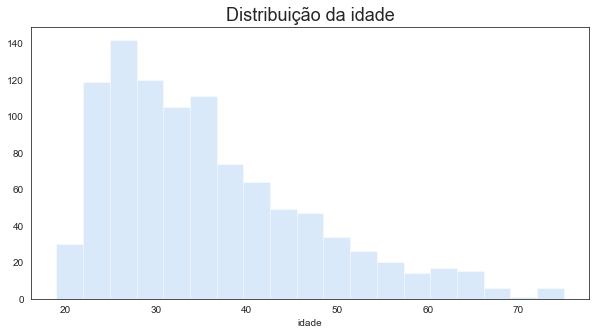

In [21]:
plt.figure(figsize = (10,5))
plt.title('Distribuição da idade', fontsize=18)
sns.distplot(dados.idade, kde=False)

Há uma concentração maior de clientes com idade entre **20 e 40 anos**.

## Análise Prazo do Empréstimo

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Prazo do Empréstimo (em meses)'}, xlabel='prazo_emprestimo_meses'>

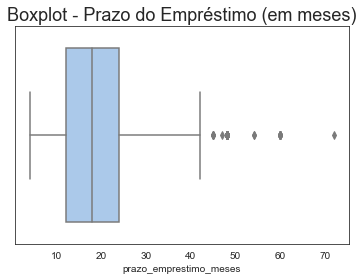

In [22]:
plt.title('Boxplot - Prazo do Empréstimo (em meses)', fontsize=18)
sns.boxplot('prazo_emprestimo_meses', data=dados)

<AxesSubplot:title={'center':'Distribuição de prazo do empréstimo'}, xlabel='prazo_emprestimo_meses', ylabel='count'>

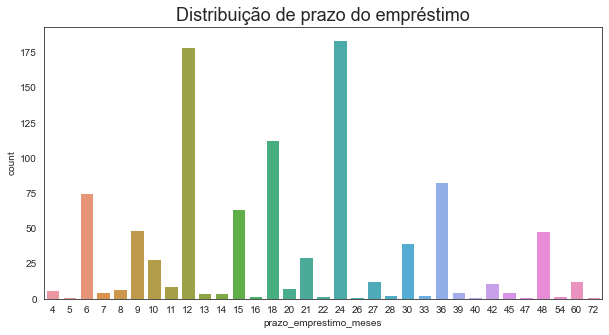

In [23]:
plt.figure(figsize = (10,5))
plt.title('Distribuição de prazo do empréstimo', fontsize=18)
sns.countplot(x = 'prazo_emprestimo_meses', data = dados)

Verificamos uma concentração bem alta na frequência de **12 meses e na de 24 meses.** Também temos aqui alguns outros valores que se destacam como **6, 18, 36 e 48 meses.**

## Análise Valor do empréstimo

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Valor do Empréstimo'}, xlabel='valor_emprestimo'>

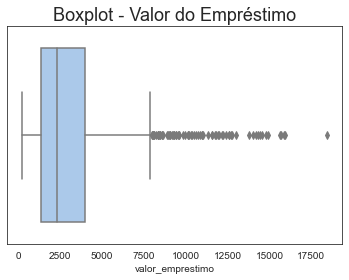

In [24]:
plt.title('Boxplot - Valor do Empréstimo', fontsize=18)
sns.boxplot('valor_emprestimo', data=dados)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição do valor do empréstimo'}, xlabel='valor_emprestimo'>

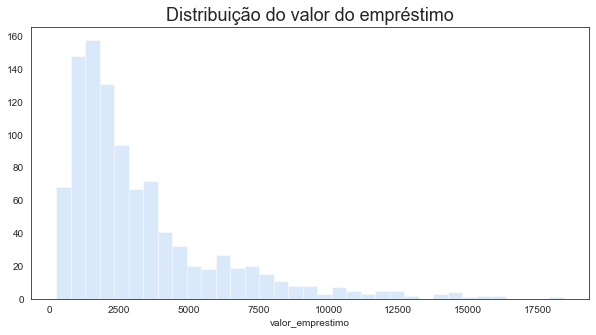

In [25]:
plt.figure(figsize = (10,5))
plt.title('Distribuição do valor do empréstimo', fontsize=18)
sns.distplot(dados.valor_emprestimo, kde=False)

Há uma maior concentração do valor de empréstimo entre **1000 e 4000 euros**.

## Conclusão análise exploratória

Verificamos na nossa base de dados:

   - Proporção de **70% de créditos negados** versus **30% de créditos concedidos**.
   
   
   - Total de **310 mulheres** e **690 homens**.


   - **Idade**:
   
       - Idade mínima: 19 anos
       - Idade mediana: 33 anos
       - Idade máxima: 75 anos
       - Há uma concentração maior de clientes com idade entre **20 e 40 anos**.
       
       
   - **Valor empréstimo**:
   
       - Valor empréstimo mínimo: 250 euros
       - Valor empréstimo mediano: 2319.5 euros
       - Valor empréstimo máximo: 18424 euros
       - Há uma maior concentração do valor de empréstimo entre **1000 e 4000 euros**.
       
         
   - **Prazo empréstimo**:
   
       - Prazo empréstimo mínimo: 4 meses
       - Prazo empréstimo mediano: 18 meses
       - Prazo empréstimo máximo: 72 meses  
       - Há uma concentração bem alta nos prazos de **12 e 24 meses.** 

# Comparando a variável default com as demais

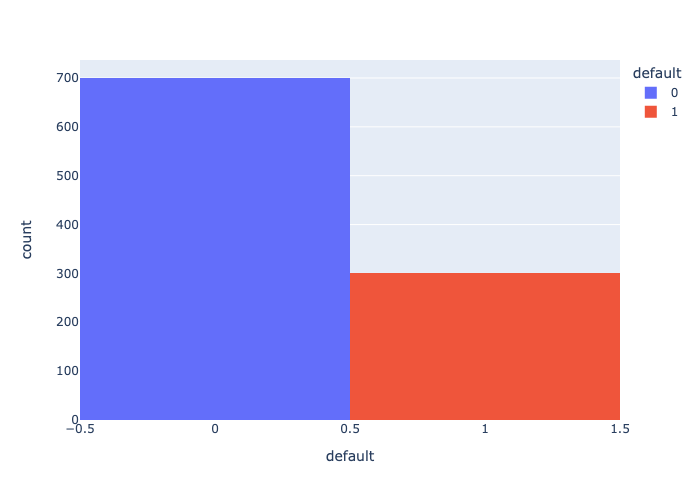

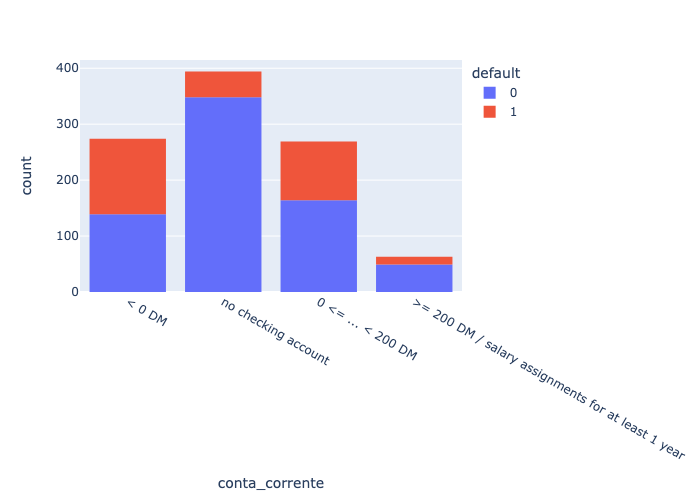

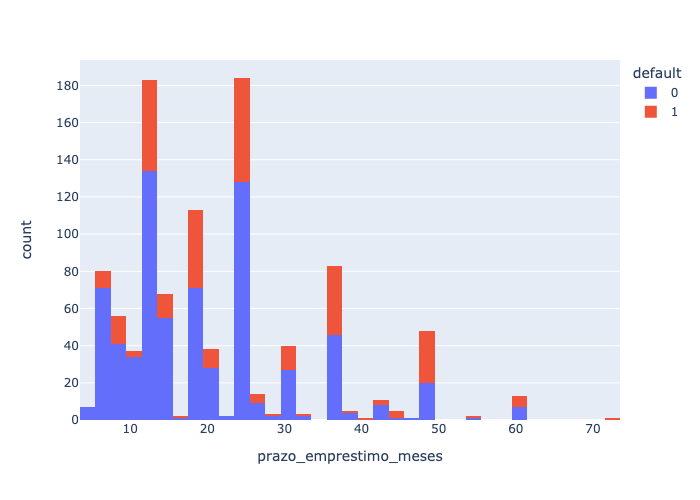

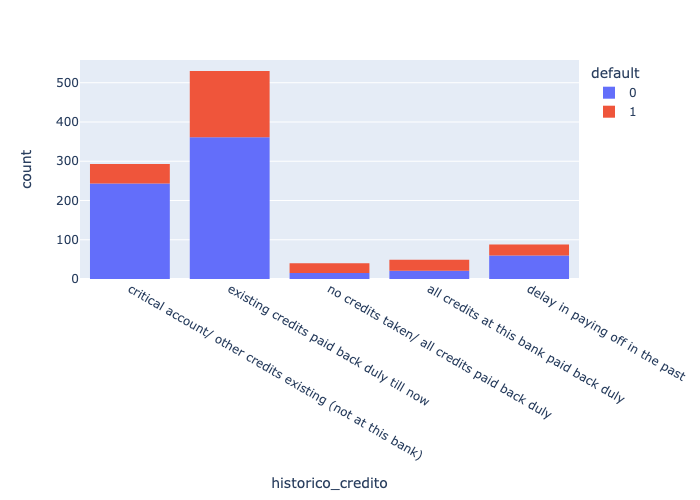

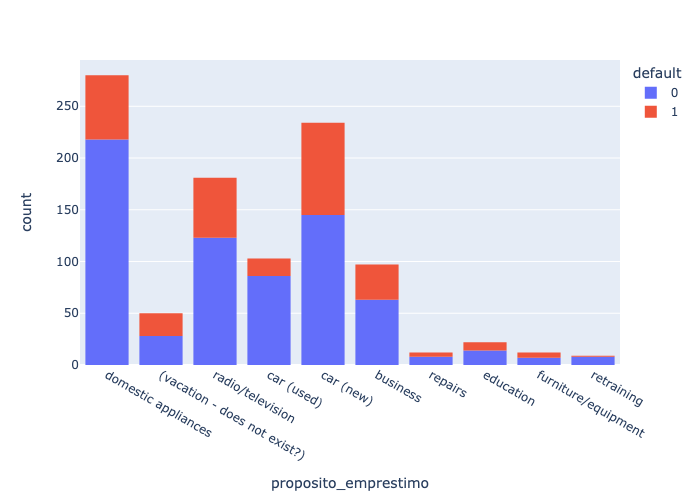

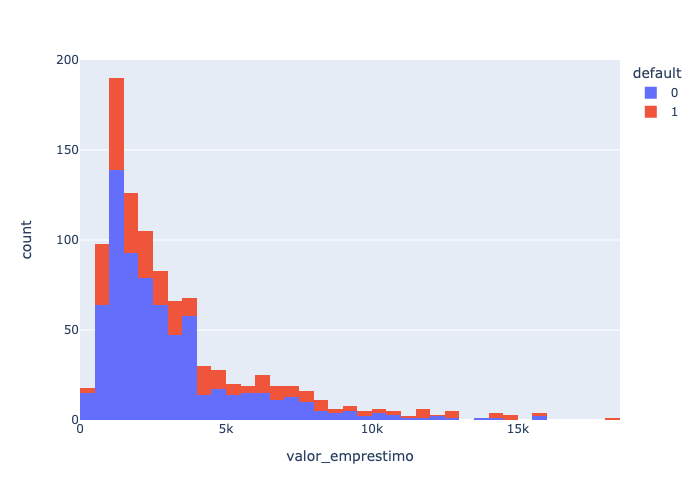

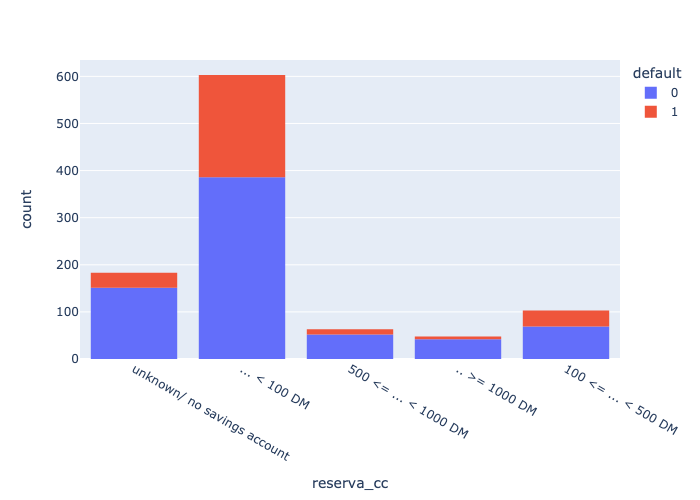

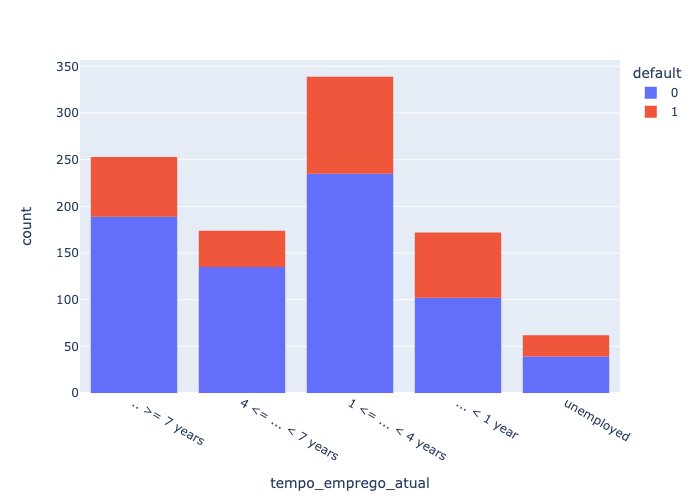

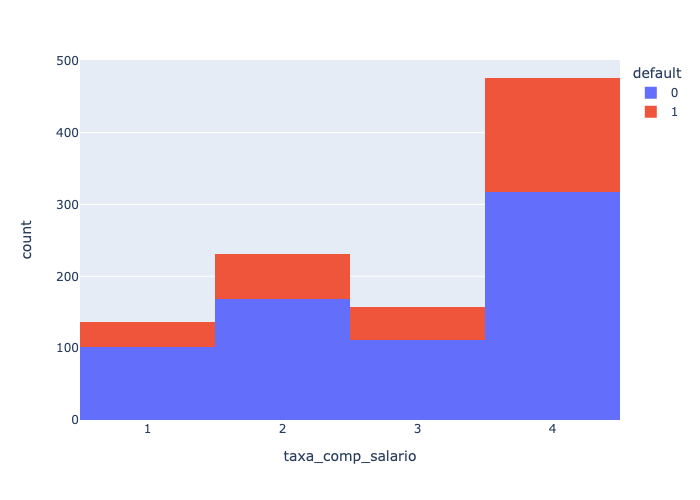

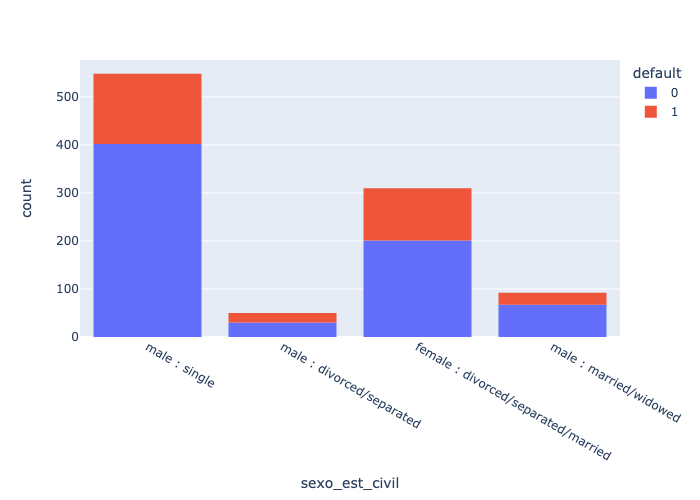

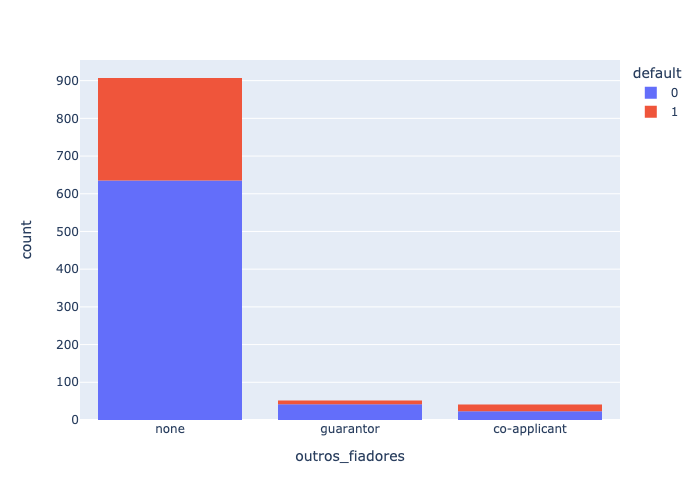

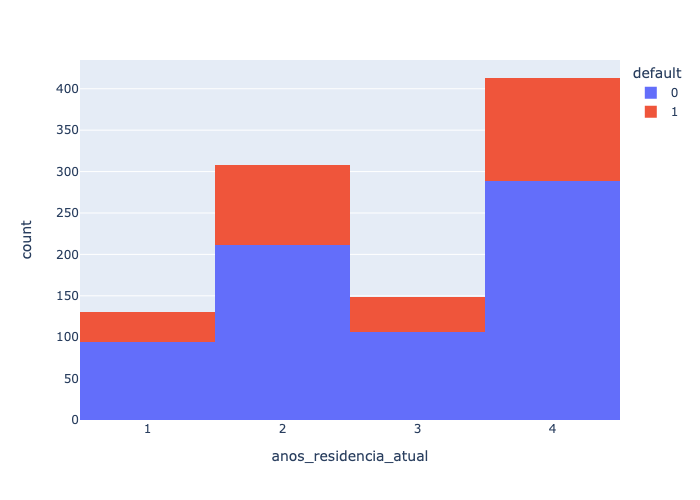

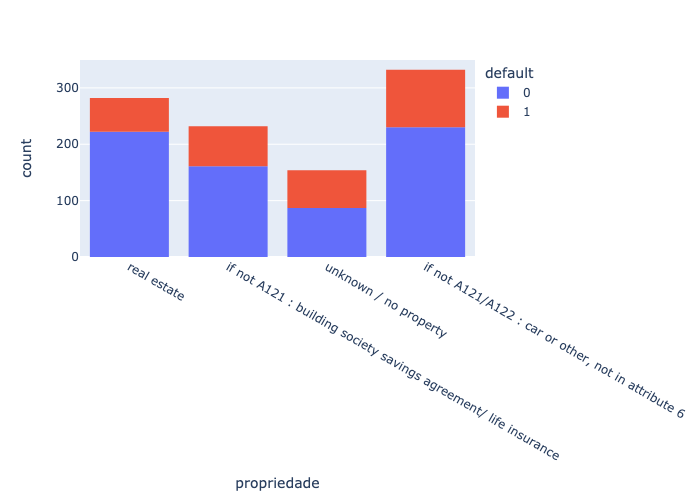

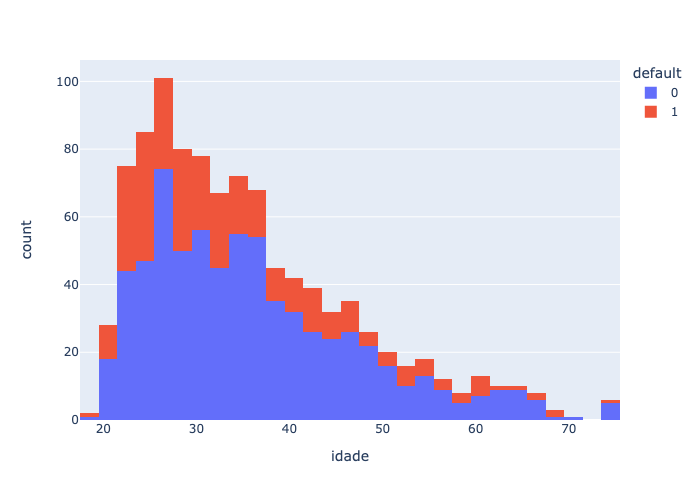

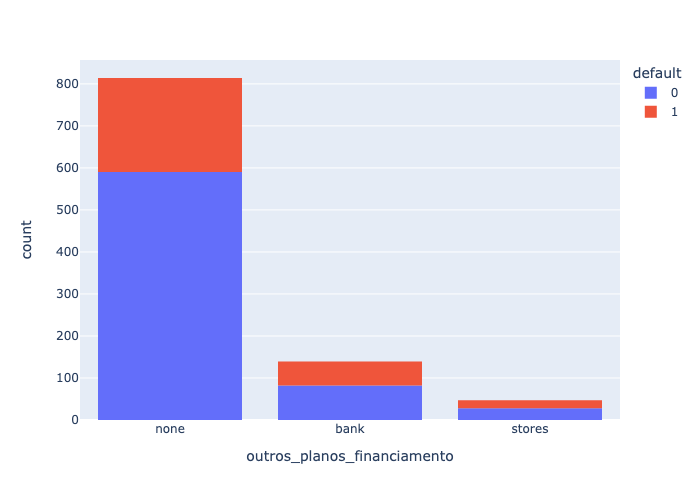

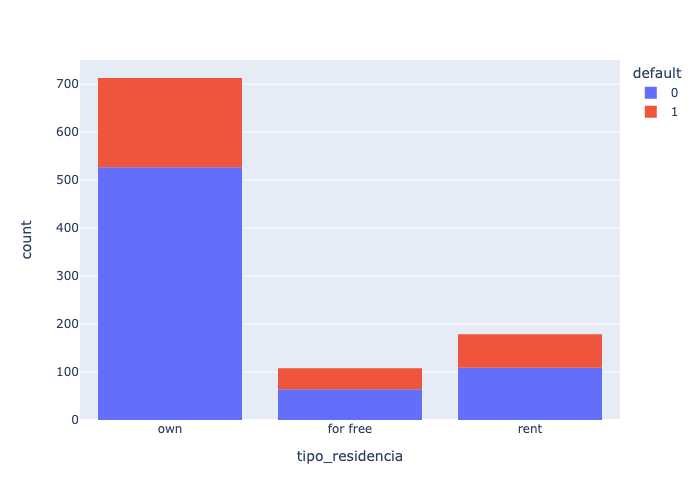

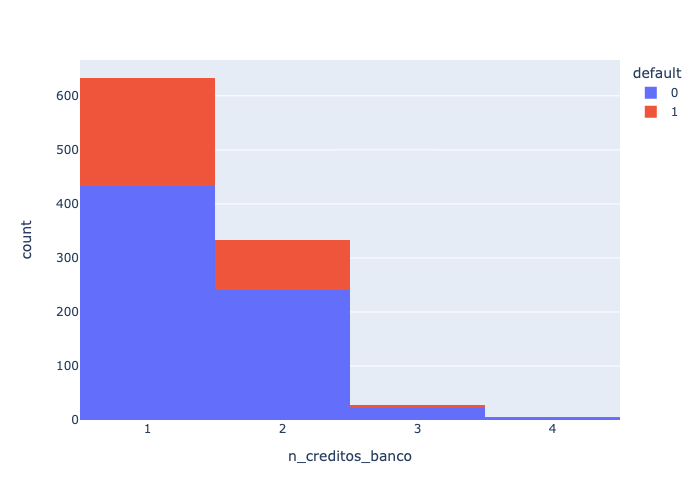

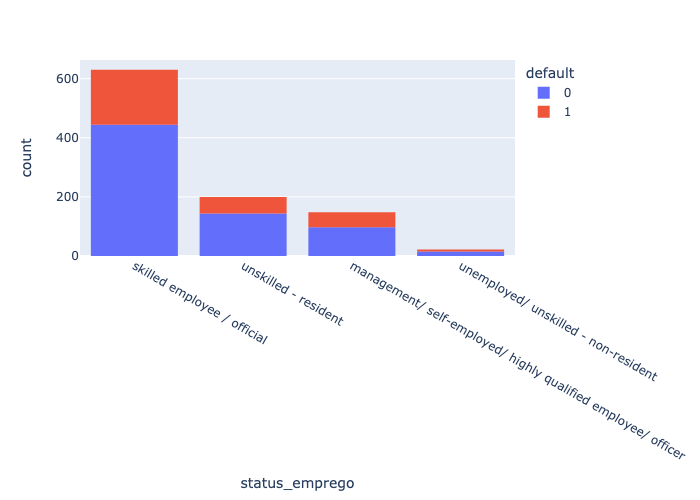

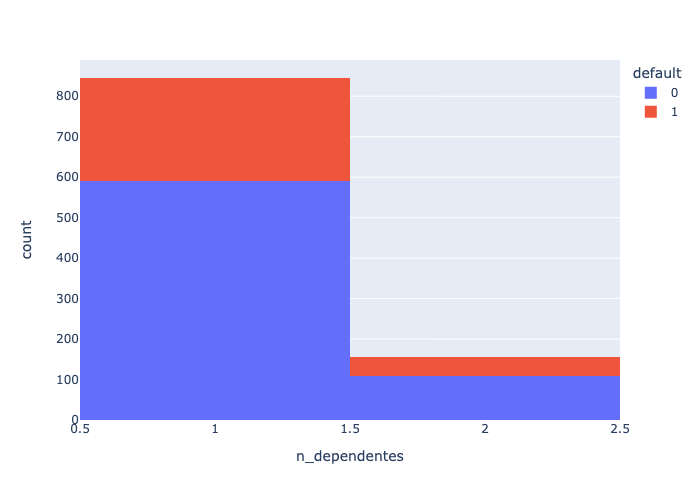

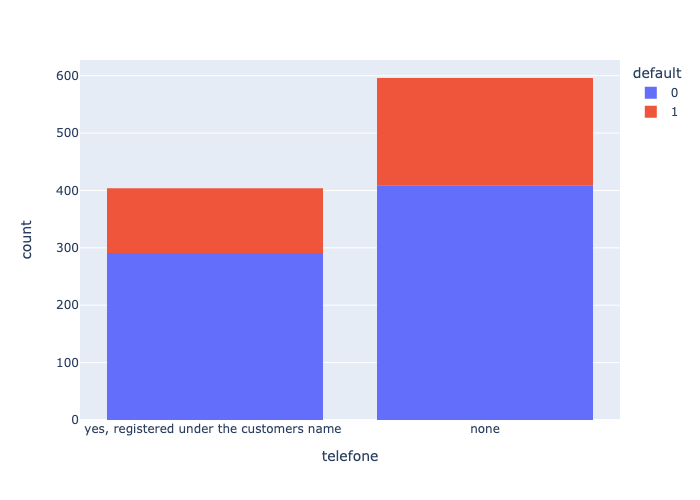

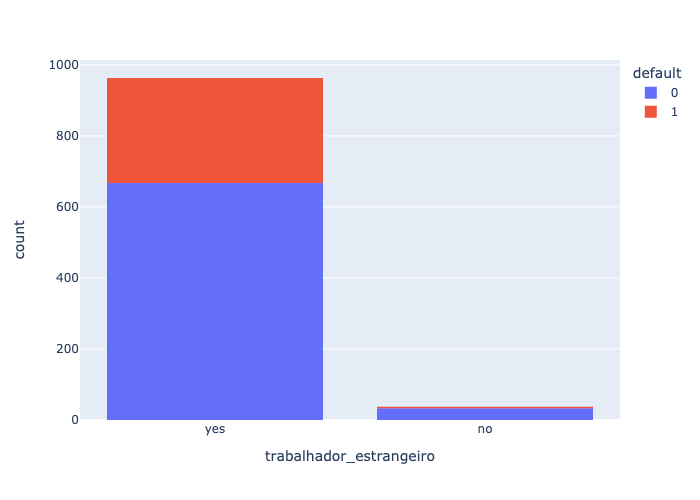

In [26]:
for coluna in dados.columns:
    
    fig = px.histogram(dados, x=coluna, color="default")
    fig.show('png')

Podemos verificar que a maioria dos clientes com **crédito negado** tem as seguintes características:
    
    Não possui conta-corrente;
    Possui conta crítica/outros créditos existentes;
    Valor do empréstimo entre 1000 e 1500 euros;
    Possui alta taxa de comprometimento do salário;
    São homens solteiros;
    Sem fiador;
    Não há telefone registrado;
    Possui 20 a 40 anos de idade;
    É trabalhador estrangeiro.

# Transformação de variáveis categóricas em numéricas

In [27]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [28]:
dic = {'< 0 DM':1,
       '0 <= ... < 200 DM':2,
       'no checking account':3,
       '>= 200 DM / salary assignments for at least 1 year':4}

dados['conta_corrente'] = dados['conta_corrente'].map(dic)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,1,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreement/ life insurance,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,none,yes
998,1,1,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [29]:
dados.historico_credito.unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [30]:
dic2 = {'critical account/ other credits existing (not at this bank)':1,
       'existing credits paid back duly till now':2,
       'delay in paying off in the past':3,
       'no credits taken/ all credits paid back duly':4,
       'all credits at this bank paid back duly':5}

dados.historico_credito = dados.historico_credito.map(dic2)
dados.historico_credito

0      1
1      2
2      1
3      2
4      3
      ..
995    2
996    2
997    2
998    2
999    1
Name: historico_credito, Length: 1000, dtype: int64

In [31]:
dados.proposito_emprestimo.unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [32]:
dic3 = {'domestic appliances':1, '(vacation - does not exist?)':2,
       'radio/television':3, 'car (new)':4, 'car (used)':5, 'business':6,
       'repairs':7, 'education':8, 'furniture/equipment':9, 'retraining':10}

dados.proposito_emprestimo = dados.proposito_emprestimo.map(dic3)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreement/ life insurance,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [33]:
dados.reserva_cc.unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [34]:
dic4 = {'unknown/ no savings account':1, '... < 100 DM':2,
       '500 <= ... < 1000 DM ':3, '.. >= 1000 DM ':4, '100 <= ... < 500 DM':5}

dados.reserva_cc = dados.reserva_cc.map(dic4)
dados.reserva_cc

0      1
1      2
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    5
Name: reserva_cc, Length: 1000, dtype: int64

In [35]:
dados.tempo_emprego_atual.unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [36]:
dic5 = {'.. >= 7 years':1, '1 <= ... < 4 years':2, '4 <= ... < 7 years':3,
       'unemployed':4, '... < 1 year ':5}

dados.tempo_emprego_atual = dados.tempo_emprego_atual.map(dic5)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,male : single,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,2,2,4,male : divorced/separated,none,4,if not A121 : building society savings agreement/ life insurance,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,male : single,none,4,"if not A121/A122 : car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,2,2,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [37]:
dados.sexo_est_civil.unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [38]:
dic6 = {'male : single' :1, 'female : divorced/separated/married':2,
       'male : divorced/separated':3, 'male : married/widowed':4}

dados.sexo_est_civil = dados.sexo_est_civil.map(dic6)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,2,2,4,3,none,4,if not A121 : building society savings agreement/ life insurance,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,1,none,4,"if not A121/A122 : car or other, not in attribute 6",38,none,own,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,2,2,4,1,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [39]:
dados.outros_fiadores.unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [40]:
dic8 = {'none':1, 'guarantor':2, 'co-applicant':3}
dados.outros_fiadores = dados.outros_fiadores.map(dic8)
dados.outros_fiadores

0      1
1      1
2      1
3      2
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: outros_fiadores, Length: 1000, dtype: int64

In [41]:
dados.propriedade.unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [42]:
dic7 = {'real estate':1,
       'if not A121 : building society savings agreement/ life insurance':2,
       'unknown / no property':3,
       'if not A121/A122 : car or other, not in attribute 6':4}

dados.propriedade = dados.propriedade.map(dic7)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,none,own,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,none,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,none,own,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [43]:
dados.outros_planos_financiamento.unique()

array(['none', 'bank', 'stores'], dtype=object)

In [44]:
dic9 = {'none':1, 'bank':2, 'stores':3}
dados.outros_planos_financiamento = dados.outros_planos_financiamento.map(dic9)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,1,own,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,1,own,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,1,own,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,1,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [45]:
dados.tipo_residencia.unique()

array(['own', 'for free', 'rent'], dtype=object)

In [46]:
dic10 = {'own':1, 'for free':2, 'rent':3}
dados.tipo_residencia = dados.tipo_residencia.map(dic10)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,1,1,1,unskilled - resident,1,none,yes
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,1,1,1,management/ self-employed/ highly qualified employee/ officer,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,1,1,1,skilled employee / official,1,none,yes
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,1,2,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [47]:
dados.status_emprego.unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [48]:
dic11 = {'skilled employee / official':1, 'unskilled - resident':2,
       'management/ self-employed/ highly qualified employee/ officer':3,
       'unemployed/ unskilled - non-resident':4}

dados.status_emprego = dados.status_emprego.map(dic11)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,1,1,1,2,1,none,yes
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,1,1,1,3,1,"yes, registered under the customers name",yes
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,1,1,1,1,1,none,yes
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,1,2,1,1,1,"yes, registered under the customers name",yes


In [49]:
dados.telefone.unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [50]:
dic12 = {'yes, registered under the customers name ':1, 'none':2}

dados.telefone = dados.telefone.map(dic12)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,yes
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,yes
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,yes
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,yes
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,1,1,1,2,1,2,yes
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,1,1,1,3,1,1,yes
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,1,1,1,1,1,2,yes
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,1,2,1,1,1,1,yes


In [51]:
dados.trabalhador_estrangeiro.unique()

array(['yes', 'no'], dtype=object)

In [52]:
dic13 = {'yes':1, 'no':2}

dados.trabalhador_estrangeiro = dados.trabalhador_estrangeiro.map(dic13)
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,12,2,3,1736,2,3,3,2,1,4,1,31,1,1,1,2,1,2,1
996,0,1,30,2,5,3857,2,2,4,3,1,4,2,40,1,1,1,3,1,1,1
997,0,3,12,2,1,804,2,1,4,1,1,4,4,38,1,1,1,1,1,2,1
998,1,1,45,2,1,1845,2,2,4,1,1,4,3,23,1,2,1,1,1,1,1


# Verificando os tipos das variáveis

In [53]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

# Matriz de correlação

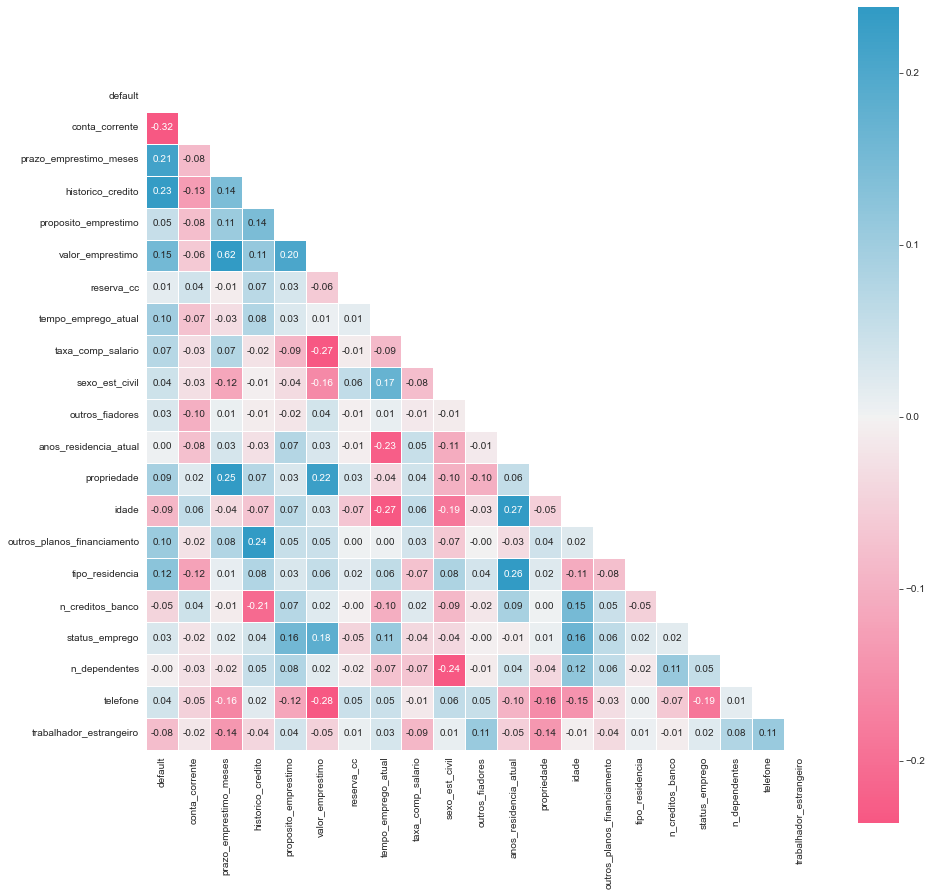

In [54]:
matrix_corr = dados.corr()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(matrix_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, robust=True, annot= True, fmt=".2f")

Conseguimos verificar que a nossa variável target **default** tem uma maior correlação com a variáveis **conta corrente e histórico crédito**

# Criando variáveis separadas Sexo e Estado Civil

Categorias da variavel **'sexo_est_civil':**

    Homem divorciado = 1
    Mulher divorciada/casada = 2
    Homem divorciado = 3
    Homem casado/viúvo = 4

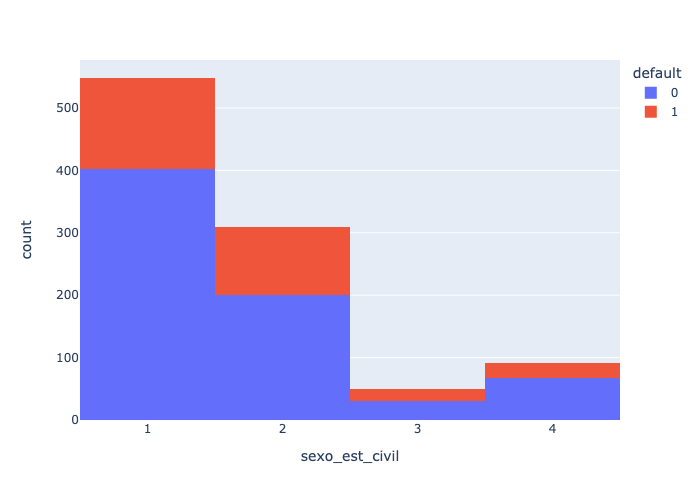

In [55]:
fig = px.histogram(dados, x='sexo_est_civil', color="default")
fig.show('png')

A ordem de concentração de clientes de acordo com gênero e estado civil é a seguinte: 

**homens divorciados > mulheres divorciadas/casadas > homens casados > homens solteiros**. 

Criando a variável **Sexo**:

    0 = Homem
    1 = Mulher

Criando a variável **Estado Civil**:

    0 = casado/divorciado/viúvo
    1 = solteiro

In [56]:
dic_sexo = {2:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 1:1, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1,0,1
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1,0,1
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1,0,1
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1,0,1


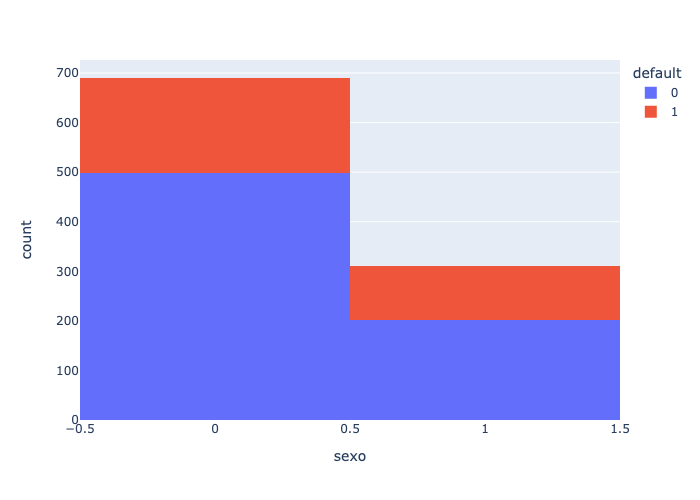

In [57]:
fig = px.histogram(dados, x='sexo', color="default")
fig.show('png')

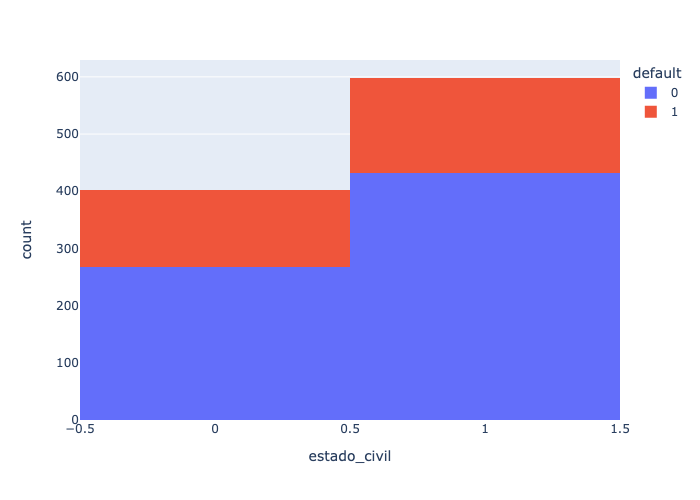

In [58]:
fig = px.histogram(dados, x='estado_civil', color="default")
fig.show('png')

In [59]:
dados = dados.drop(columns='sexo_est_civil')

# Machine Learning

O algoritmo de **Regressão Logística** foi selecionado para o desenvolvimento do projeto porque pode ser replicado com facilidade e também conseguimos entender bem como as variáveis do problema estão afetando os resultados. Além de que, não exige grande poder computacional e isso a torna atrativa já que podemos ter grandes bases de dados de clientes.

## Definindo as features (dados de entrada) e os labels (dados de saída)

In [60]:
y = dados['default']
x = dados.drop(columns='default')

## Criação de bases de treino e de teste

In [61]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [62]:
print(f'A base de treino tem {treino_x.shape[0]} elementos e base de teste tem {teste_x.shape[0]} elementos.')

A base de treino tem 700 elementos e base de teste tem 300 elementos.


## Regressão Logística

In [63]:
# criando o modelo
modelo = LogisticRegression(max_iter = 1000)

# treinando o modelo
modelo.fit(treino_x, treino_y)

# criando as previsoes
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Avaliação do modelo

Com os modelos treinados e as previsões feitas, os modelos podem ser comparados utilizando de métricas de machine learning. Serão usadas as seguintes métricas:

   **Acurácia**, que mostra a taxa de acerto do modelo;
   
   **Precisão**, que é a proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria ;
   
   **Recall**, que é a proporção de predições corretas da categoria alvo ;
   
   **F1**, que é a média harmonica entre a precisão e o recall;
   
   **Matriz de confusão**, que mostra a contagem dos acertos e dos erros do modelo de machine learning.
   
   **Curva Roc**, que avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos para diferentes limites. Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos.

In [64]:
acuracia_treino = modelo.score(treino_x, treino_y)
acuracia_treino = round(acuracia_treino, 3)*100
print(f'A acurácia de treino é de {acuracia_treino}%')

A acurácia de treino é de 75.0%


In [65]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
print(f'A acurácia de teste é de {acuracia}%')

A acurácia de teste é de 76.7%


In [66]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.64      0.42      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.75      0.77      0.75       300



## Matriz de confusão

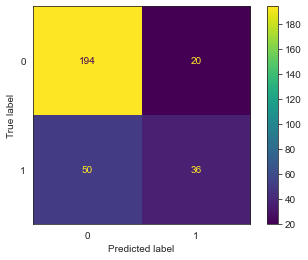

In [71]:
cm = confusion_matrix(teste_y, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Pela matriz de confusão conseguimos verificar o seguinte:

    - 194 clientes classificados como bons pagadores que são realmente bons pagadores

    - 20 clientes classificados como bons pagadores que são maus pagadores (predição errada)

    - 50 clientes classificados como maus pagadores que são bons pagadores (predição errada)

    - 36 clientes classificados como maus pagadores que são realmente maus pagadores

**Predições corretas: 230**

**Predições erradas: 70**


## Curva ROC

A curva **ROC** avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos. 

roc_auc 0.752825472723321


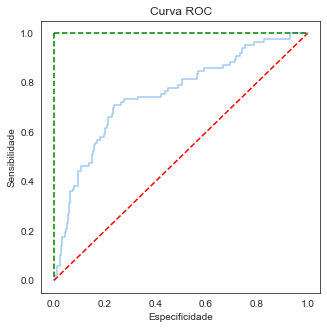

In [68]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') 
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') 
plt.show()

O **AUC** quantifica a curva **ROC**. Ou seja, através da área sob a curva, ele me diz o quão bom está o nosso gráfico. 
Se a área da curva ROC é menor do que 0.7, temos uma baixa discriminação na base de dados, no modelo. 
Se a área está contida entre 0.7 e 0.8, temos uma discriminação aceitável, porém baixa. 
Se a área está entre 0.8 e 0.9, temos uma ótima, uma discriminação excelente no modelo. 
E se a área é maior do que 0.9, temos uma discriminação excepcional.

Nós podemos ver aqui que a nossa AUC, neste gráfico, é **0.75**. Ou seja, temos uma discriminação aceitável. 

# Conclusões

Conseguimos concluir após nosso estudo que o banco precisa ficar atento a alguns padrões da maioria dos clientes com **crédito negado**:
    
    Não possui conta-corrente;
    Possui conta crítica/outros créditos existentes;
    Valor do empréstimo entre 1000 e 1500 euros;
    Possui alta taxa de comprometimento do salário;
    São homens solteiros;
    Sem fiador;
    Não há telefone registrado;
    Possui 20 a 40 anos de idade;
    É trabalhador estrangeiro.